# Advanced MLP
- Advanced techniques for training neural networks
  - Weight Initialization
  - Nonlinearity (Activation function)
  - Optimizers
  - Batch Normalization
  - Dropout (Regularization)
  - Model Ensemble

In [76]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers
from keras.layers import Dropout
import numpy as np
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from keras.layers import BatchNormalization

## Load Dataset
- MNIST dataset

In [77]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [78]:
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


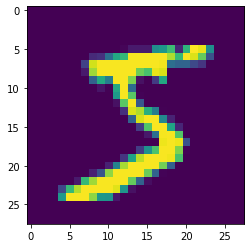

Label:  5


In [79]:
plt.imshow(X_train[0])    # show first number in the dataset
plt.show()
print('Label: ', y_train[0])

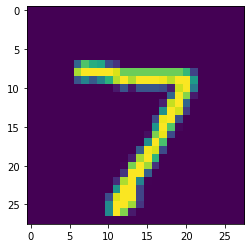

Label:  7


In [80]:
plt.imshow(X_test[0])    # show first number in the dataset
plt.show()
print('Label: ', y_test[0])

In [81]:
# reshaping X data: (n, 28, 28) => (n, 784)
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

In [82]:
print(X_train.shape)

(60000, 784)


In [83]:
# use only 33% of training data to expedite the training process
X_train, _ , y_train, _ = train_test_split(X_train, y_train, test_size = 0.67, random_state = 7)

In [84]:
# converting y data into categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [85]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(19800, 784) (10000, 784) (19800, 10) (10000, 10)


# Basic MLP model

In [86]:
model = Sequential()

In [87]:
model.add(Dense(50, input_shape = (784, )))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [88]:
sgd = optimizers.SGD(lr = 0.001) #Adam하면 금방 올라감
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [89]:
history = model.fit(X_train, y_train, batch_size = 256, validation_split = 0.3, epochs = 200, verbose = 0)

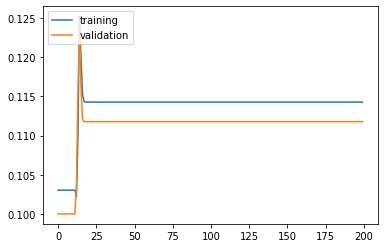

In [90]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [91]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 27us/step


In [92]:
print('Test accuracy: ', results[1])

Test accuracy:  0.11349999904632568


## 1. Weight Initialization

- Xavier
- Uniform distribution : sqrt( 6 / (fan_in + fan_out))
- Normal distribution  : N(0, sqrt(2. / (fan_in + fan_out)))

- HE
- Uniform distribution : limit is sqrt( 6 / fan_in)
- Normal distribution : N(0, sqrt(2 / fan_in))

In [93]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [94]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

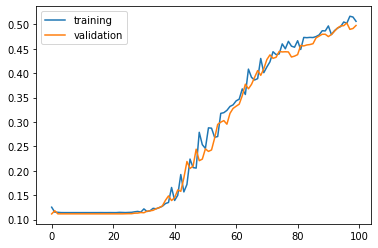

In [95]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [96]:
results = model.evaluate(X_test, y_test)
print(results)

10000/10000 [==============================] - 0s 28us/step
[2.071749970626831, 0.5123999714851379]


In [97]:
print('Test accuracy: ', results[1])

Test accuracy:  0.5123999714851379


## 2. Nonlinearity (Activation function)

In [98]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(Activation('relu'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('relu'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('relu'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('relu'))    
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [99]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

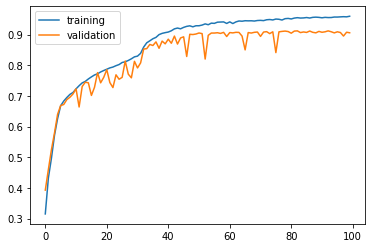

In [100]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [101]:
results = model.evaluate(X_test, y_test)
print(results)

10000/10000 [==============================] - 0s 28us/step
[0.5154353042438626, 0.906499981880188]


In [102]:
print('Test accuracy: ', results[1])

Test accuracy:  0.906499981880188


## 3. Optimizers

In [103]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(BatchNormalization())       
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(BatchNormalization())       
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(BatchNormalization())       
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(BatchNormalization())       
    model.add(Activation('sigmoid'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [104]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

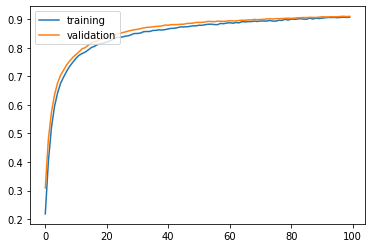

In [105]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [106]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 44us/step


In [107]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9129999876022339


## 4. Batch Normalization

비선형 변환 전에 추가

In [108]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('sigmoid'))    
    model.add(Dropout(0.2))                        # Dropout layer after Activation
    model.add(Dense(50))
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))                        # Dropout layer after Activation
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dropout(0.2))                        # Dropout layer after Activation
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dropout(0.2))                         # Dropout layer after Activation
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [109]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

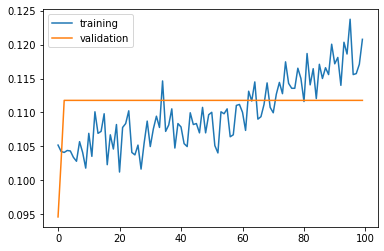

In [110]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [111]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 30us/step


In [112]:
print('Test accuracy: ', results[1])

Test accuracy:  0.11349999904632568


## 5. Dropout (Regularization)

In [116]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('sigmoid'))    
    model.add(Dropout(0.2))                        # Dropout layer after Activation
    model.add(Dense(50))
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))                        # Dropout layer after Activation
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dropout(0.2))                        # Dropout layer after Activation
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dropout(0.2))                         # Dropout layer after Activation
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [117]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

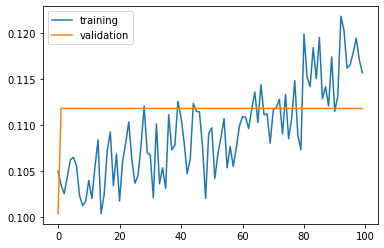

In [118]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [119]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 33us/step


In [120]:
print('Test accuracy: ', results[1])

Test accuracy:  0.11349999904632568


## 6. Model Ensemble

In [121]:
y_train = np.argmax(y_train, axis = 1)
y_test = np.argmax(y_test, axis = 1)

In [63]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [69]:
model1 = KerasClassifier(build_fn = mlp_model, epochs = 100, verbose = 1)   #build funcion 에 model data  입력
model2 = KerasClassifier(build_fn = mlp_model, epochs = 100, verbose = 1)
model3 = KerasClassifier(build_fn = mlp_model, epochs = 100, verbose = 1)

In [70]:
ensemble_clf = VotingClassifier(estimators = [
    ('model1', model1),
    ('model2', model2),
    ('model3', model3)], voting = 'soft') #soft, hard, 가중평균, 산술평균

In [71]:
ensemble_clf.fit(X_train, y_train)

Epoch 1/100
19800/19800 [==============================] - 1s 44us/step - loss: 2.3655 - accuracy: 0.1150
Epoch 2/100
19800/19800 [==============================] - 1s 39us/step - loss: 2.3095 - accuracy: 0.1055
Epoch 3/100
19800/19800 [==============================] - 1s 40us/step - loss: 2.3021 - accuracy: 0.1086
Epoch 4/100
19800/19800 [==============================] - 1s 39us/step - loss: 2.3009 - accuracy: 0.1135
Epoch 5/100
19800/19800 [==============================] - 1s 39us/step - loss: 2.3005 - accuracy: 0.1135
Epoch 6/100
19800/19800 [==============================] - 1s 39us/step - loss: 2.3002 - accuracy: 0.1135
Epoch 7/100
19800/19800 [==============================] - 1s 40us/step - loss: 2.3000 - accuracy: 0.1135
Epoch 8/100
19800/19800 [==============================] - 1s 40us/step - loss: 2.2997 - accuracy: 0.1135
Epoch 9/100
19800/19800 [==============================] - 1s 40us/step - loss: 2.2994 - accuracy: 0.1135
Epoch 10/100
19800/19800 [====================

19800/19800 [==============================] - 1s 43us/step - loss: 2.2867 - accuracy: 0.1135
Epoch 54/100
19800/19800 [==============================] - 1s 43us/step - loss: 2.2863 - accuracy: 0.1135
Epoch 55/100
19800/19800 [==============================] - 1s 43us/step - loss: 2.2858 - accuracy: 0.1135
Epoch 56/100
19800/19800 [==============================] - 1s 43us/step - loss: 2.2854 - accuracy: 0.1136
Epoch 57/100
19800/19800 [==============================] - 1s 42us/step - loss: 2.2850 - accuracy: 0.1135
Epoch 58/100
19800/19800 [==============================] - 1s 42us/step - loss: 2.2845 - accuracy: 0.1135
Epoch 59/100
19800/19800 [==============================] - 1s 42us/step - loss: 2.2841 - accuracy: 0.1135
Epoch 60/100
19800/19800 [==============================] - 1s 42us/step - loss: 2.2836 - accuracy: 0.1135
Epoch 61/100
19800/19800 [==============================] - 1s 42us/step - loss: 2.2831 - accuracy: 0.1136
Epoch 62/100
19800/19800 [========================

VotingClassifier(estimators=[('model1',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001FB1083AD48>),
                             ('model2',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001FB1083AD08>),
                             ('model3',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001FB1083AD88>)],
                 flatten_transform=True, n_jobs=None, voting='soft',
                 weights=None)

In [72]:
y_pred = ensemble_clf.predict(X_test)

10000/10000 [==============================] - 0s 37us/step


In [73]:
print('Test accuracy:', accuracy_score(y_pred, y_test))

Test accuracy: 0.2633


# Advanced MLP - 2
    - More training set
    - Weight Initialization scheme
    - Nonlinearity (Activation function)
    - Optimizers: adaptvie
    - Batch Normalization
    - Dropout (Regularization)
    - Model Ensemble

In [122]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshaping X data: (n, 28, 28) => (n, 784)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1] * X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1] * X_test.shape[2]))
# We use all training data and validate on all test data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [123]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [127]:
# create 5 models to ensemble
from keras.callbacks import LambdaCallback
from keras.callbacks import EarlyStopping
from keras.layers import LeakyReLU


def lambdaf_(epoch, logs, step) : 
    if epoch % step == 0 : print(f"{epoch} => {logs}")                
        
def printepoch(step) :   
    return LambdaCallback(on_epoch_end=lambda epoch, logs: lambdaf_(epoch, logs, step)  )

model1 = KerasClassifier(build_fn = mlp_model, epochs = 3)
model2 = KerasClassifier(build_fn = mlp_model, epochs = 3)
model3 = KerasClassifier(build_fn = mlp_model, epochs = 3)
model4 = KerasClassifier(build_fn = mlp_model, epochs = 3)
model5 = KerasClassifier(build_fn = mlp_model, epochs = 3)



In [128]:
#ensemble_clf = VotingClassifier(estimators = [('model1', model1), ('model2', model2), ('model3', model3), ('model4', model4), ('model5', model5)], voting = 'soft')
ensemble_clf = VotingClassifier(estimators = [('model1', model1), ('model2', model2)], voting = 'soft')

In [129]:
ensemble_clf.fit(X_train, y_train)

Epoch 1/3
60000/60000 [==============================] - 8s 130us/step - loss: 0.7529 - accuracy: 0.7692
Epoch 2/3
60000/60000 [==============================] - 7s 119us/step - loss: 0.4344 - accuracy: 0.8745
Epoch 3/3
60000/60000 [==============================] - 7s 119us/step - loss: 0.3621 - accuracy: 0.8963
Epoch 1/3
60000/60000 [==============================] - 9s 144us/step - loss: 0.7567 - accuracy: 0.7711
Epoch 2/3
60000/60000 [==============================] - 8s 134us/step - loss: 0.4211 - accuracy: 0.8794
Epoch 3/3
60000/60000 [==============================] - 8s 137us/step - loss: 0.3534 - accuracy: 0.8996


VotingClassifier(estimators=[('model1',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001FB16C4B848>),
                             ('model2',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001FB16C4B488>)],
                 flatten_transform=True, n_jobs=None, voting='soft',
                 weights=None)

In [130]:
y_pred = ensemble_clf.predict(X_test)

In [131]:
print('Acc: ', accuracy_score(y_pred, y_test))

Acc:  0.9629
